In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\buchi\Desktop\phython notbooks\Credit card fraud detection\creditcard.csv")

In [3]:
data.shape

(284807, 31)

In [4]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
##we don't need time column for classfication so we removed it....
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.isnull().sum() ##null values means Not any number not zeros

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
## classfying into fraud data and not fraud data

fraud_data = data[data.Class == 1]
not_fraud_data = data[data.Class == 0]

<AxesSubplot:xlabel='Class', ylabel='count'>

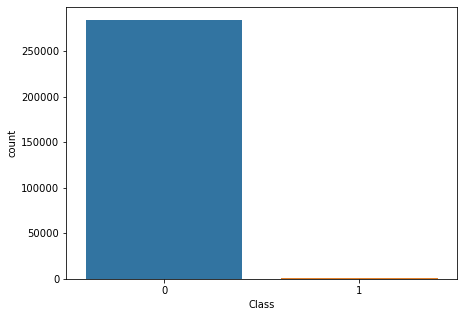

In [10]:
plt.figure(figsize = (7,5))
sns.countplot('Class', data = data)

In [11]:
num_0,num_1=data['Class'].value_counts()
print(num_1/(len(data)))

0.001727485630620034


## KeyTakeways:
__Data is heavily imbalanced(0.00172% fraud data). It should be balanced to avoid bias that weakens the minority class__

<AxesSubplot:xlabel='Time', ylabel='Density'>

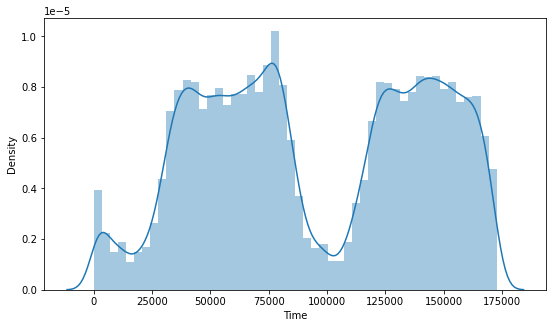

In [12]:
plt.figure(figsize = (9,5))
sns.distplot(data['Time'])

<AxesSubplot:xlabel='Time', ylabel='Density'>

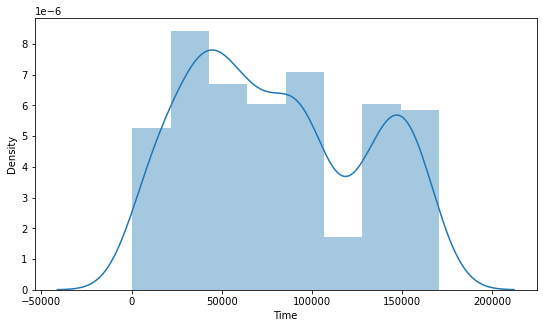

In [13]:
#fraud transactions time distribution
plt.figure(figsize = (9,5))
sns.distplot(fraud_data['Time'])

In [1]:
#Normal transactions time distribution
plt.figure(figsize = (9,5))
sns.distplot(not_fraud_data['Time'])

SyntaxError: unmatched ')' (<ipython-input-1-0b4e24cf0679>, line 3)

Text(0.5, 1.0, 'Normal Transactions')

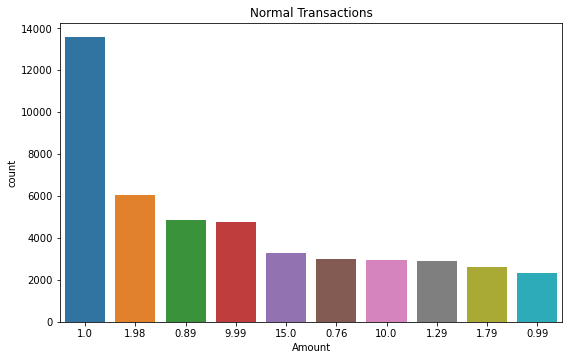

In [15]:
plt.figure(figsize = (9,5.5))
sns.countplot('Amount', order = not_fraud_data['Amount'].value_counts().index[:10], data = not_fraud_data)
plt.title('Normal Transactions')

Text(0.5, 1.0, 'Fraud Transactions')

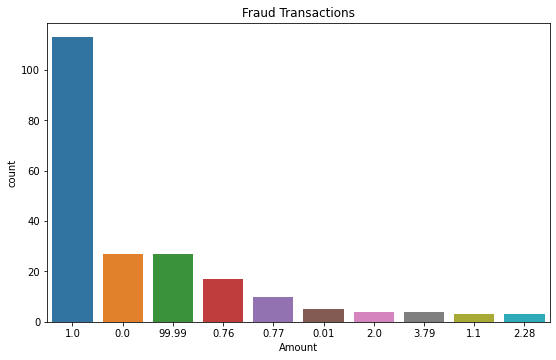

In [16]:
plt.figure(figsize = (9,5.5))
sns.countplot('Amount', order = fraud_data['Amount'].value_counts().index[:10], data = fraud_data)
plt.title('Fraud Transactions')

In [17]:
# scaling the amount and time feature using minmaxscaler
m = MinMaxScaler()
data['scaled_amount'] = m.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = m.fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Amount', 'Time'], axis = 1, inplace= True)

In [18]:
majority_class = not_fraud_data.index
minority_class = fraud_data.index

In [19]:
minority_class_len = len(minority_class)
minority_class_len

492

In [20]:
random_majority_index = np.random.choice(majority_class, minority_class_len, replace = False)
len(random_majority_index)

492

In [21]:
under_sampled_index = np.concatenate([random_majority_index,minority_class])

In [22]:
under_sampled_data = data.loc[under_sampled_index]
under_sampled_data.index = range(0, len(under_sampled_data))

<AxesSubplot:xlabel='Class', ylabel='count'>

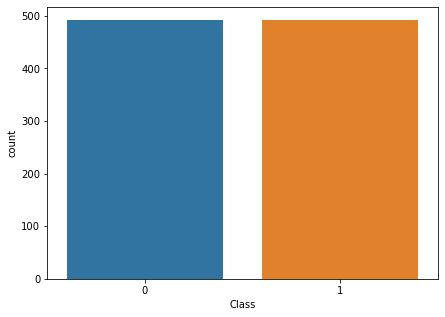

In [23]:
plt.figure(figsize = (7,5))
sns.countplot('Class', data = under_sampled_data)

<AxesSubplot:>

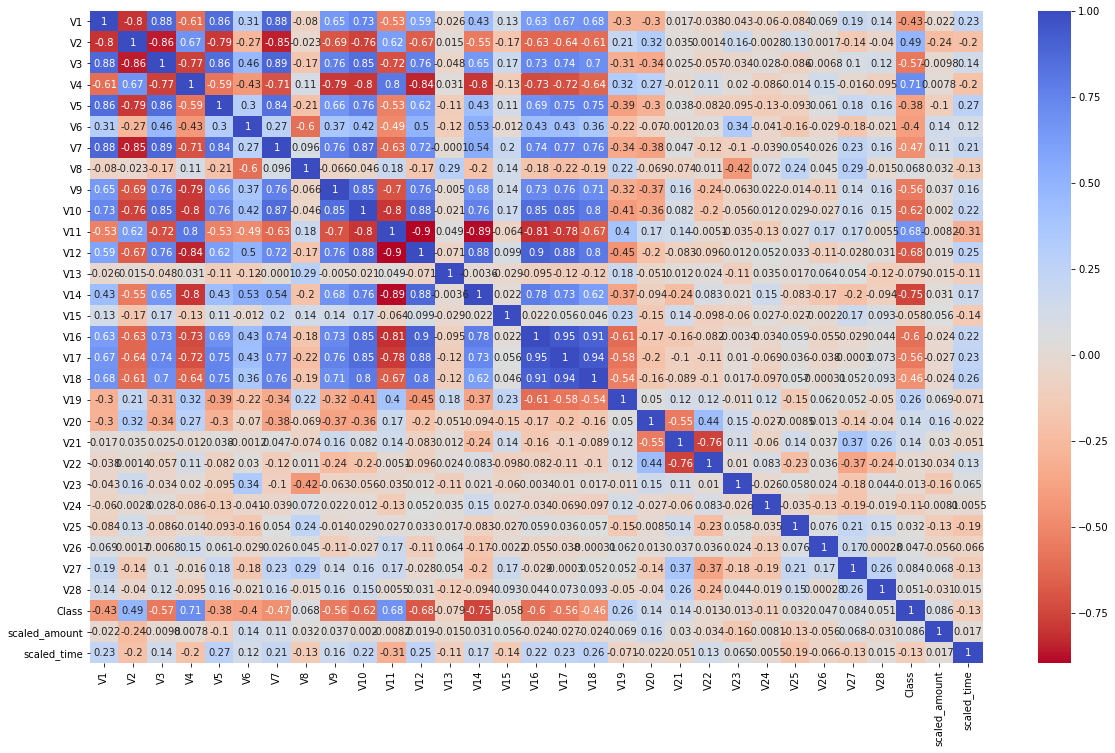

In [24]:
# correlation on under sampled data
plt.figure(figsize = (20,12))
cor = under_sampled_data.corr()
sns.heatmap(cor, cmap='coolwarm_r', annot=True)

In [25]:
X = under_sampled_data.drop('Class', axis= 1)
y = under_sampled_data['Class']

In [26]:
#splitting the data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state = 42, stratify = y)

In [27]:
#train data
print('Non-fraud data is', len(y_train[y_train == 0]))
print('fraud data is',len(y_train[y_train == 1]))

Non-fraud data is 329
fraud data is 330


In [28]:
#test data
print('Non-fraud data is', len(y_test[y_test == 0]))
print('fraud data is',len(y_test[y_test == 1]))

Non-fraud data is 163
fraud data is 162


In [29]:
X1 = data.drop('Class', axis= 1)
y1 = data['Class']

In [33]:
sm = SMOTE(random_state=42, sampling_strategy= 1)
X_new, y_new = sm.fit_resample(X1,y1)

In [34]:
#after sampling
print('Non-fraud data is', len(y_new[y_new == 0]))
print('fraud data is',len(y_new[y_new == 1]))

Non-fraud data is 284315
fraud data is 284315


In [35]:
X1_df = data.drop('Class', axis= 1)
Smote_data = pd.DataFrame(X_new, columns= X1_df.columns)
Smote_data['Class'] = y_new

In [36]:
rf_clf = RandomForestClassifier()
rf = rf_clf.fit(X_new,y_new) 

In [37]:
fimp_col = []
fimp = []
for i,column in enumerate(X1):
    fimp_col.append(column)
    fimp.append(rf.feature_importances_[i])

In [38]:
fimp_df = pd.DataFrame(zip(fimp_col,fimp), columns = ['Features', 'Feature Importance'])
fimp_df = fimp_df.sort_values('Feature Importance', ascending = False).reset_index()

In [39]:
fimp_df['F_imp_cumulative'] = fimp_df['Feature Importance'].cumsum()
fimp_df

,index,Features,Feature Importance,F_imp_cumulative
0,13,V14,0.192684,0.192684
1,9,V10,0.121699,0.314382
2,11,V12,0.109246,0.423628
3,3,V4,0.105670,0.529298
4,10,V11,0.083573,0.612871
5,16,V17,0.082755,0.695626
6,6,V7,0.042512,0.738138
7,2,V3,0.042319,0.780457
8,15,V16,0.026878,0.807335
9,1,V2,0.021502,0.828837


In [40]:
Not_important_features = list(fimp_df['Features'][12:])
print(Not_important_features)

['V8', 'V5', 'V9', 'V1', 'V19', 'V13', 'scaled_amount', 'V6', 'V20', 'V26', 'V28', 'V15', 'scaled_time', 'V23', 'V27', 'V25', 'V22', 'V24']


Text(0.5, 1.0, 'Feature Importance-SMOTE Data')

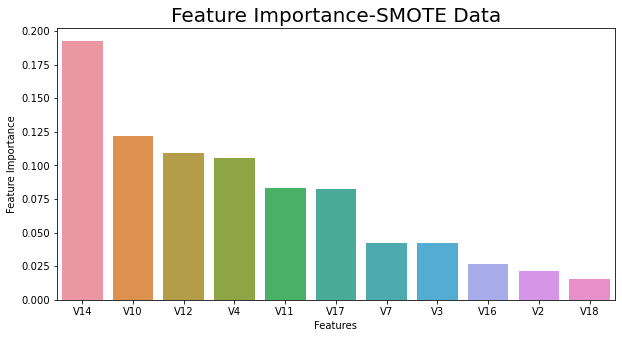

In [41]:
# top 10 features based on feature importance
plt.figure(figsize = (10,5))
sns.barplot('Features','Feature Importance', data = fimp_df[:11])
plt.title('Feature Importance-SMOTE Data',size = 20)

<AxesSubplot:>

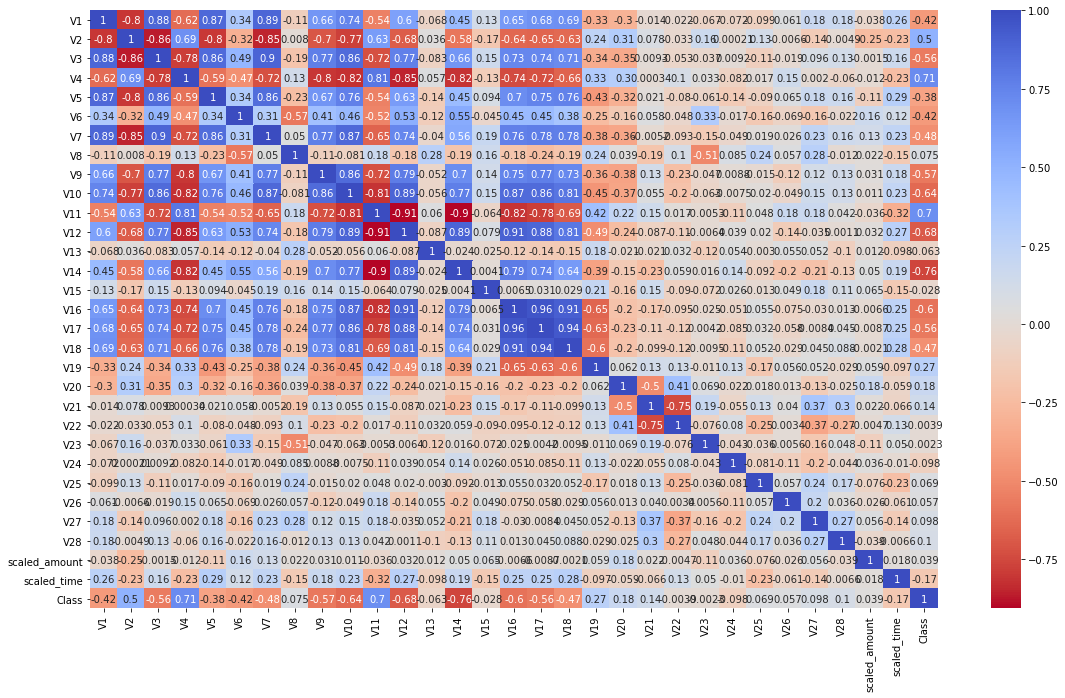

In [42]:
# correlation on SMOTE data
plt.figure(figsize = (19,11))
cor1 = Smote_data.corr()
sns.heatmap(cor1, cmap='coolwarm_r', annot = True)

In [43]:
# dropping the insignificant features
Final_data = data.drop(Not_important_features, axis=1)

In [44]:
skfold = StratifiedKFold(n_splits = 5)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
cv_performance_metrics = list(['Fit_time','score_time','test_accuracy', 'test_Ppecision', 'test_recall', 'test_F1'])

In [45]:
# Algorithms
log_reg = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# parameters
kfold = KFold(n_splits = 5)
algo_list = list([log_reg,knn,svc,d_tree,rf_clf])
algo_name = list(['Logistic regression','K Nearest Neighbor','Support vector classifier', 'Decision Tree', 'Random Forest'])
performance_metrics = list(['Accuracy', 'Precision', 'Recall', 'F1','AUC_ROC_Score'])

In [46]:
# cross validation on various algorithms
def cross_validation(algo,X,y,fold,scoring):
    algo_score = []
    for i in algo:
        score = cross_validate(i, X, y, cv = fold, scoring = scoring)
        cv_metrics = dict(zip(cv_performance_metrics,[round(np.mean(score[j]),6) for j in score]))
        algo_score.append(cv_metrics)
    return algo_score

In [47]:
result = cross_validation(algo_list, X, y,skfold,scoring)

In [48]:
cv_score = dict(zip(algo_name,result))
cv_score

{'Logistic regression': {'Fit_time': 0.010808,
  'score_time': 0.003595,
  'test_accuracy': 0.933922,
  'test_Ppecision': 0.969464,
  'test_recall': 0.896351,
  'test_F1': 0.931178},
 'K Nearest Neighbor': {'Fit_time': 0.001601,
  'score_time': 0.009999,
  'test_accuracy': 0.928841,
  'test_Ppecision': 0.971313,
  'test_recall': 0.884168,
  'test_F1': 0.925007},
 'Support vector classifier': {'Fit_time': 0.008402,
  'score_time': 0.006202,
  'test_accuracy': 0.930876,
  'test_Ppecision': 0.984523,
  'test_recall': 0.876067,
  'test_F1': 0.926471},
 'Decision Tree': {'Fit_time': 0.013403,
  'score_time': 0.003001,
  'test_accuracy': 0.912582,
  'test_Ppecision': 0.915984,
  'test_recall': 0.908596,
  'test_F1': 0.912062},
 'Random Forest': {'Fit_time': 0.198253,
  'score_time': 0.010796,
  'test_accuracy': 0.935958,
  'test_Ppecision': 0.978134,
  'test_recall': 0.89229,
  'test_F1': 0.932872}}

In [49]:
def model(algo,X_train,y_train, X_test, y_test):
    algo_performance = []
    for i in algo:
        clf = i.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        Accuracy = accuracy_score(y_test, y_pred)
        Precision = precision_score(y_test, y_pred)
        Recall = recall_score(y_test, y_pred)
        F1 = f1_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred)
        metrics = dict(zip(performance_metrics,[Accuracy,Precision,Recall,F1,auc_score]))
        algo_performance.append(metrics)
    return algo_performance

In [50]:
t_result = model(algo_list,X_train, y_train, X_test, y_test)

In [51]:
final_score = dict(zip(algo_name,t_result))
final_score

{'Logistic regression': {'Accuracy': 0.9446153846153846,
  'Precision': 0.9444444444444444,
  'Recall': 0.9444444444444444,
  'F1': 0.9444444444444444,
  'AUC_ROC_Score': 0.944614860259032},
 'K Nearest Neighbor': {'Accuracy': 0.9569230769230769,
  'Precision': 0.9805194805194806,
  'Recall': 0.9320987654320988,
  'F1': 0.9556962025316457,
  'AUC_ROC_Score': 0.9568469287283194},
 'Support vector classifier': {'Accuracy': 0.9538461538461539,
  'Precision': 0.9803921568627451,
  'Recall': 0.9259259259259259,
  'F1': 0.9523809523809523,
  'AUC_ROC_Score': 0.953760508975233},
 'Decision Tree': {'Accuracy': 0.92,
  'Precision': 0.9,
  'Recall': 0.9444444444444444,
  'F1': 0.9216867469879517,
  'AUC_ROC_Score': 0.9200749829584186},
 'Random Forest': {'Accuracy': 0.9569230769230769,
  'Precision': 0.9743589743589743,
  'Recall': 0.9382716049382716,
  'F1': 0.9559748427672956,
  'AUC_ROC_Score': 0.9568658638188291}}

In [52]:
new_X = Final_data.drop('Class', axis= 1).values
new_y = Final_data['Class'].values

In [53]:
new_X

array([[-0.07278117,  2.53634674,  1.37815522, ...,  0.20797124,
         0.02579058, -0.01830678],
       [ 0.26615071,  0.16648011,  0.44815408, ..., -0.11480466,
        -0.18336127, -0.22577525],
       [-1.34016307,  1.77320934,  0.37977959, ...,  1.10996938,
        -0.12135931,  0.24799815],
       ...,
       [-0.30125385, -3.24963981, -0.55782812, ...,  0.31350179,
         0.39565248,  0.23204504],
       [ 0.53048251,  0.70251023,  0.68979917, ...,  0.50992846,
         1.11398059,  0.26524492],
       [-0.18973334,  0.70333737, -0.50627124, ..., -0.66037665,
         0.16742993,  0.26105733]])

In [64]:
# cross validation on various algorithms
def cross_validation(algo,X,y):
    
    algo_performance = []
    
    for train, test in kfold.split(X,y):
    
        x_train = X[train]
        y_train = y[train]
        x_test = X[test]
        y_test = y[test]
        
        sm = SMOTE(random_state=42,sampling_strategy = 1.0)
        X_train_sam, y_train_sam = sm.fit_resample(x_train, y_train)
        
        for i in algo:
            clf = i.fit(X_train_sam, y_train_sam)
            y_pred = clf.predict(x_test)
            Accuracy = accuracy_score(y_test, y_pred)
            Precision = precision_score(y_test, y_pred)
            Recall = recall_score(y_test, y_pred)
            F1 = f1_score(y_test, y_pred)
            auc_score = roc_auc_score(y_test, y_pred)
            metrics = dict(zip(performance_metrics,[Accuracy,Precision,Recall,F1,auc_score]))
            algo_performance.append(metrics)
    return algo_performance

In [ ]:
#training in SMOTE data with most important features # 9:10 pm
result = cross_validation(algo_list, new_X, new_y)

In [ ]:
#oversampled data
cv_score = dict(zip(algo_name,result))
cv_score